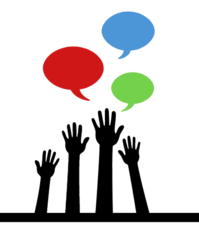

## Graduate Rotational Internship Program (GRIP): The Sparks Foundation

## Data Science & Business Analytics Internship

### Task 1: To predict the percentage of a student based on the no. of study hours.

   #### BY MONIMA GHOSH

### Importing the required Packages

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Reading data from remote link

In [5]:
url = "http://bit.ly/w-data"
ds = pd.read_csv(url)
print("Data imported sucessfully")

Data imported sucessfully


In [6]:
ds.shape

(25, 2)

In [7]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
ds.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
# Reading data information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Visualizing the Dataset

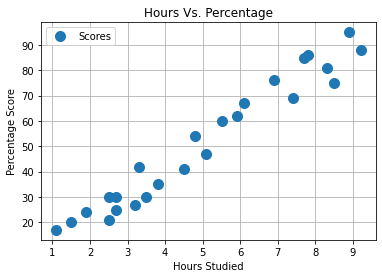

In [10]:
#plotting the data points using matplotlib 
ds.plot(x='Hours', y='Scores', style='.', markersize='20')  
plt.title('Hours Vs. Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()

In [11]:
#checking correlation between hours and scores
ds.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Plotting Regression Line

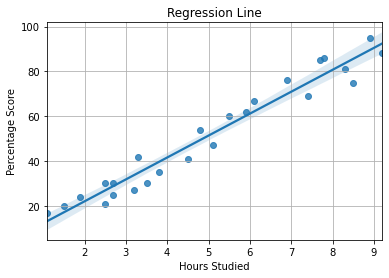

In [12]:
sns.regplot(x = ds['Hours'],y = ds['Scores'])
plt.title('Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()

### Preparing the data

In [13]:
X = ds.iloc[:, :-1].values #iloc() to split the columns in the dataset 
Y = ds.iloc[:, 1].values

In [14]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Splitting the data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [17]:
X_train.shape

(20, 1)

In [18]:
X_test.shape

(5, 1)

### Training the Algorithm

In [19]:
m = LinearRegression()
m.fit(X_train, Y_train)
print(m.intercept_)
print(m.coef_)

2.018160041434683
[9.91065648]


### Visualizing the model

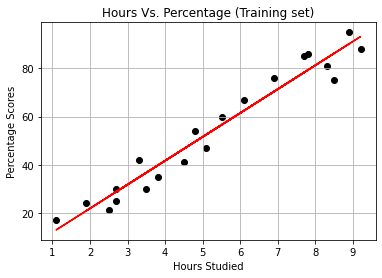

In [20]:
#### Visualizing the training set
plt.scatter(X_train,Y_train, color = 'black')#for data 
plt.plot(X_train,m.predict(X_train),color = 'red') #for best fit line 
plt.title('Hours Vs. Percentage (Training set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid()

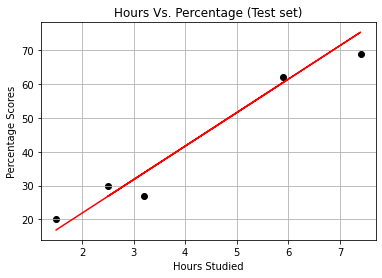

In [21]:
#### Visualizing the test set
plt.scatter(X_test,Y_test, color = 'black') #for data
plt.plot(X_test,m.predict(X_test),color = 'red') #for best fit line 
plt.title('Hours Vs. Percentage (Test set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.grid()

### Make Predictions

In [22]:
Y_pred = m.predict(X_test)
ds = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
ds

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


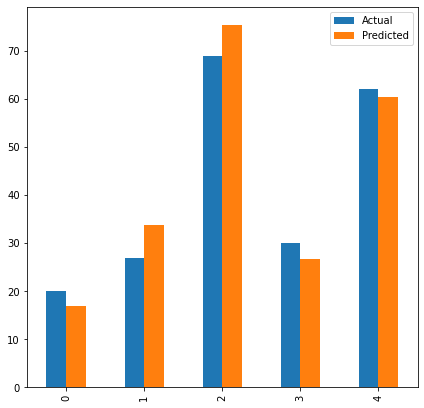

In [23]:
#Plotting bar chart to see the difference between actual vs predicted 
ds.plot(kind = 'bar', figsize = (7,7))
plt.show()

### The predicted score if a person studies for 9.25 hours per day

In [24]:
hours = [9.25]
own_pred = m.predict([hours])  
print("Number of hours = {}".format(hours))  
print("Prediction Score = {}".format(round(own_pred[0],2)))

Number of hours = [9.25]
Prediction Score = 93.69


### Model Evaluation

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
